# Firing Cost

### Input Variables:

$G$ Max number of tenure workers  
$\phi$ Percentage of Wage Paid as Firing Cost  
$S=\left\{ \begin{array}{l l}
1 & \text{Seniority}\\
0 & \text{No Seniority}
\end{array} \right.$ Increase of Firing Cost per year of tenure  
$W$ Wage Structure

### Output Variables:

$\mathbb{FC}$ Grid with the Firing Cost of each Tenure Worker

## Function:

As of: 28/04/2015

In [3]:
function FiringCost(G::Int,ϕ::Float64,S::Bool,W::Array{Float64,1})
    
    """Create a grid with the adjustment costs 
    paid by the firm for firing a worker for 
    each level of tenure.

    Parameters
    ----------
    G: Max Number of Tenure Workers
    ϕ: Firing Cost as Share of Wage 
    S: Seniority Dummy
    W: Wage Structure
    
    Output
    ----------
    FC: Grid with the Firing Cost of each Tenure Worker
    """
    
    TGrid=[-1:G-2]*S+1;        # 3/33 = 9%
    
    FC=TGrid.*(ϕ*W);           # 26/33 = 79%
    
    return FC
    
end

FiringCost (generic function with 1 method)

In [23]:
3/33

0.09090909090909091

## Growing Size

$G$

In [5]:
ϕ=0.1;
S=true;

## Time

Max Size and Sample Size

In [13]:
Ms=400;
Ss=50;

### Test

In [14]:
# Warm Up Run
G=10;
W=ones(G);
FiringCost(G,ϕ,S,W)   #

t=[1.0:Ms];
b=[1.0:Ss];

for i=1:Ms
    
    for j=1:Ss
        
        W=ones(i);
        a=@elapsed FiringCost(i,ϕ,S,W)
        b[j]=a;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

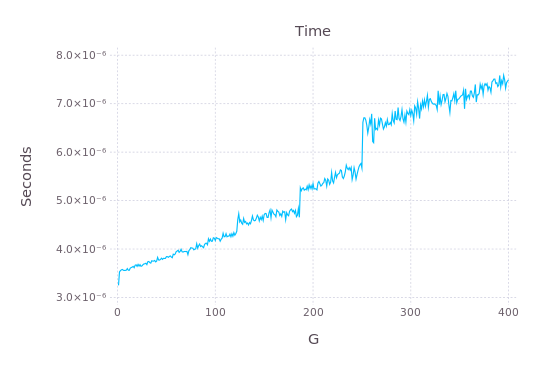

In [15]:
using Gadfly

plot(x=[1:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [8]:
Ms=400;
Ss=50;

### Test

In [16]:
# Warm Up Run
G=10;
W=ones(G);
FiringCost(G,ϕ,S,W)   #

t=[1.0:Ms];
b=[1.0:Ss];

for i=1:Ms
    
    for j=1:Ss
        
        W=ones(i);
        a=@allocated FiringCost(i,ϕ,S,W)
        b[j]=a/10^6.0;
        
    end
    
    t[i]=minimum(b);
    
end

### Plot Result

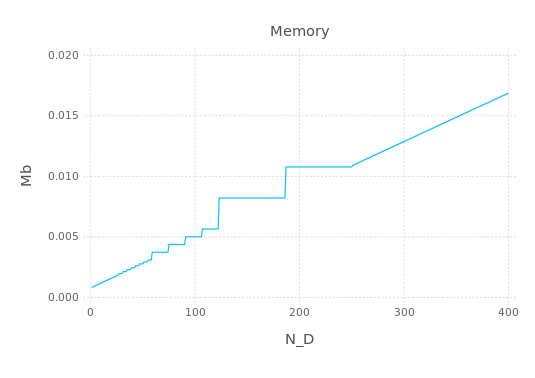

In [17]:
plot(x=[1:Ms], y=t,Guide.xlabel("N_D"),Guide.ylabel("Mb"),Guide.title("Memory"), Geom.line)

## Profile

In [18]:
G=12;
ϕ=0.1;
S=true;
W=ones(G);

Sample Size

In [19]:
Rep=10000;

In [21]:
Profile.clear()
@profile (for i=1:Rep;FiringCost(G,ϕ,S,W);end)
Profile.print()

33 task.jl; anonymous; line: 340
 33 ...3/IJulia/src/IJulia.jl; eventloop; line: 123
  33 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   33 loading.jl; include_string; line: 97
    30 profile.jl; anonymous; line: 2
     3  In[3]; FiringCost; line: 19
      1 array.jl; .*; line: 761
      2 array.jl; .+; line: 759
     26 In[3]; FiringCost; line: 21
      15 broadcast.jl; broadcast!; line: 227
       13 broadcast.jl; _F_; line: 88
        1 broadcast.jl; check_broadcast_shape; line: 51
        5 broadcast.jl; check_broadcast_shape; line: 54
        1 broadcast.jl; check_broadcast_shape; line: 56
        6 broadcast.jl; check_broadcast_shape; line: 57
         1 ./range.jl; done; line: 252
      5  broadcast.jl; broadcast_shape; line: 34
      1  broadcast.jl; broadcast_shape; line: 35
      1  broadcast.jl; broadcast_shape; line: 39
      1  broadcast.jl; broadcast_shape; line: 40
      2  broadcast.jl; broadcast_shape; line: 45
    3  profile.jl; anonymous; line: 14